
Open Price:
Mean Absolute Percentage Error (MAPE): 1.05%

Close Price:
Mean Absolute Percentage Error (MAPE): 2.22%

High Price:
Mean Absolute Percentage Error (MAPE): 1.50%

Low Price:
Mean Absolute Percentage Error (MAPE): 1.90%


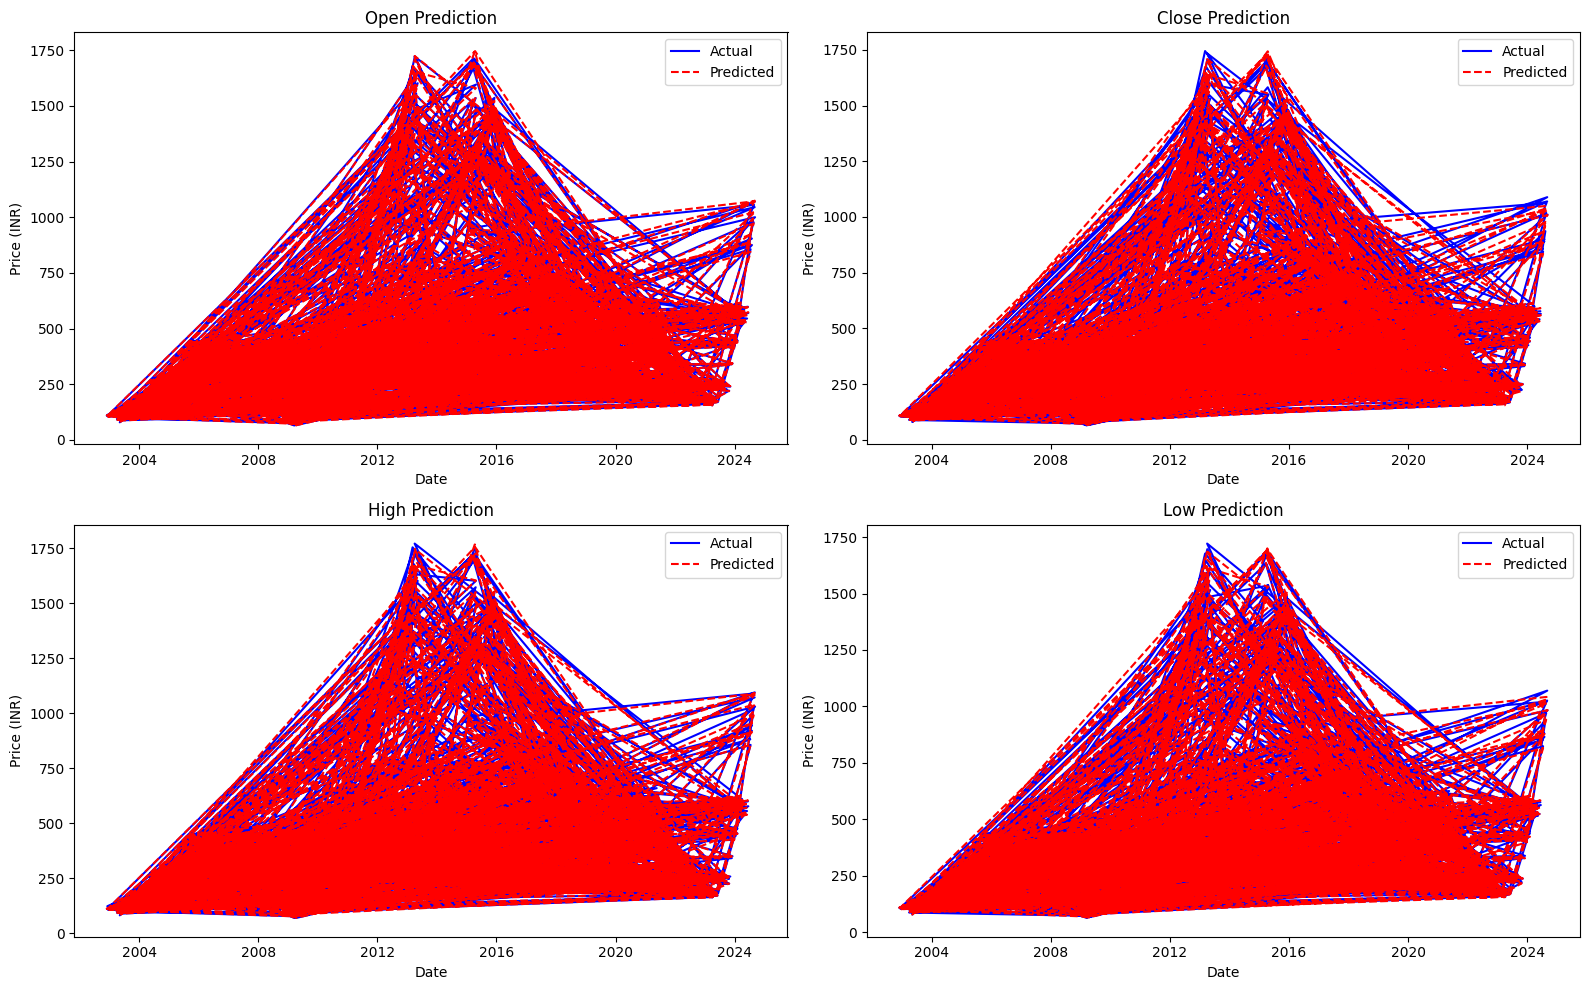


Predicted prices for the next day:
Opening Price: ₹1025.87
Closing Price: ₹1028.69
Maximum Price: ₹1043.92
Minimum Price: ₹1005.30


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

# Fetching stock data
def fetch_stock_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="max")
        if data.empty:
            raise ValueError(f"No data found for ticker {ticker}")
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

stock = 'WOCKPHARMA.NS'
historical_data = fetch_stock_data(stock)

if historical_data.empty:
    raise SystemExit("Exiting due to data fetch error.")

# Feature Engineering and Preprocessing
def preprocess_data(stock_data):
    stock_data['Prev Close'] = stock_data['Close'].shift(1)
    stock_data['100-Day MA'] = stock_data['Close'].rolling(window=100).mean()
    stock_data['Volume'] = stock_data['Volume']
    stock_data = stock_data.dropna()

    X = stock_data[['Prev Close', '100-Day MA', 'Volume']]
    y = stock_data[['Open', 'Close', 'High', 'Low']]
    return X, y

# preprocessing
X, y = preprocess_data(historical_data)

# Data Transformation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    non_zero_elements = y_true != 0
    return np.mean(np.abs((y_true[non_zero_elements] - y_pred[non_zero_elements]) / y_true[non_zero_elements])) * 100

for i, target_name in enumerate(['Open', 'Close', 'High', 'Low']):
    mape = mean_absolute_percentage_error(y_test.iloc[:, i].values, y_pred[:, i])
    print(f'\n{target_name} Price:')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Visualization
def plot_predictions(y_test, y_pred, target_names):
    plt.figure(figsize=(16, 10))
    for i, target_name in enumerate(target_names):
        plt.subplot(2, 2, i+1)
        plt.plot(y_test.index, y_test[target_name], label='Actual', color='blue')
        plt.plot(y_test.index, y_pred[:, i], label='Predicted', color='red', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Price (INR)')
        plt.title(f'{target_name} Prediction')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred, ['Open', 'Close', 'High', 'Low'])

#  Predict Next Day's Prices (unchanged)
def predict_next_day(model, stock_data, scaler):
    last_row = stock_data.iloc[-1:].copy()
    last_row['Prev Close'] = last_row['Close']
    last_row['100-Day MA'] = stock_data['Close'].rolling(window=100).mean().iloc[-1] if len(stock_data) >= 100 else last_row['Close']
    last_row['Volume'] = last_row['Volume']
    last_row = last_row[['Prev Close', '100-Day MA', 'Volume']]
    last_row = last_row.fillna(0)
    last_row_scaled = scaler.transform(last_row)
    next_day_prediction = model.predict(last_row_scaled)
    return next_day_prediction[0]

next_day_prices = predict_next_day(model, historical_data, scaler)
print(f'\nPredicted prices for the next day:')
print(f'Opening Price: ₹{next_day_prices[0]:.2f}')
print(f'Closing Price: ₹{next_day_prices[1]:.2f}')
print(f'Maximum Price: ₹{next_day_prices[2]:.2f}')
print(f'Minimum Price: ₹{next_day_prices[3]:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0175 - val_loss: 0.0021
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - val_loss: 8.9912e-04
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0018 - val_loss: 7.1012e-04
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0016 - val_loss: 9.2088e-04
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0016 - val_loss: 9.2009e-04
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0014 - val_loss: 6.3187e-04
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0013 - val_loss: 5.9229e-04
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012 - val_loss: 5.7767e-04
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0011 - val_loss: 6.0753e-04
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013 - val_loss: 8.2283e-04
Epoch 1

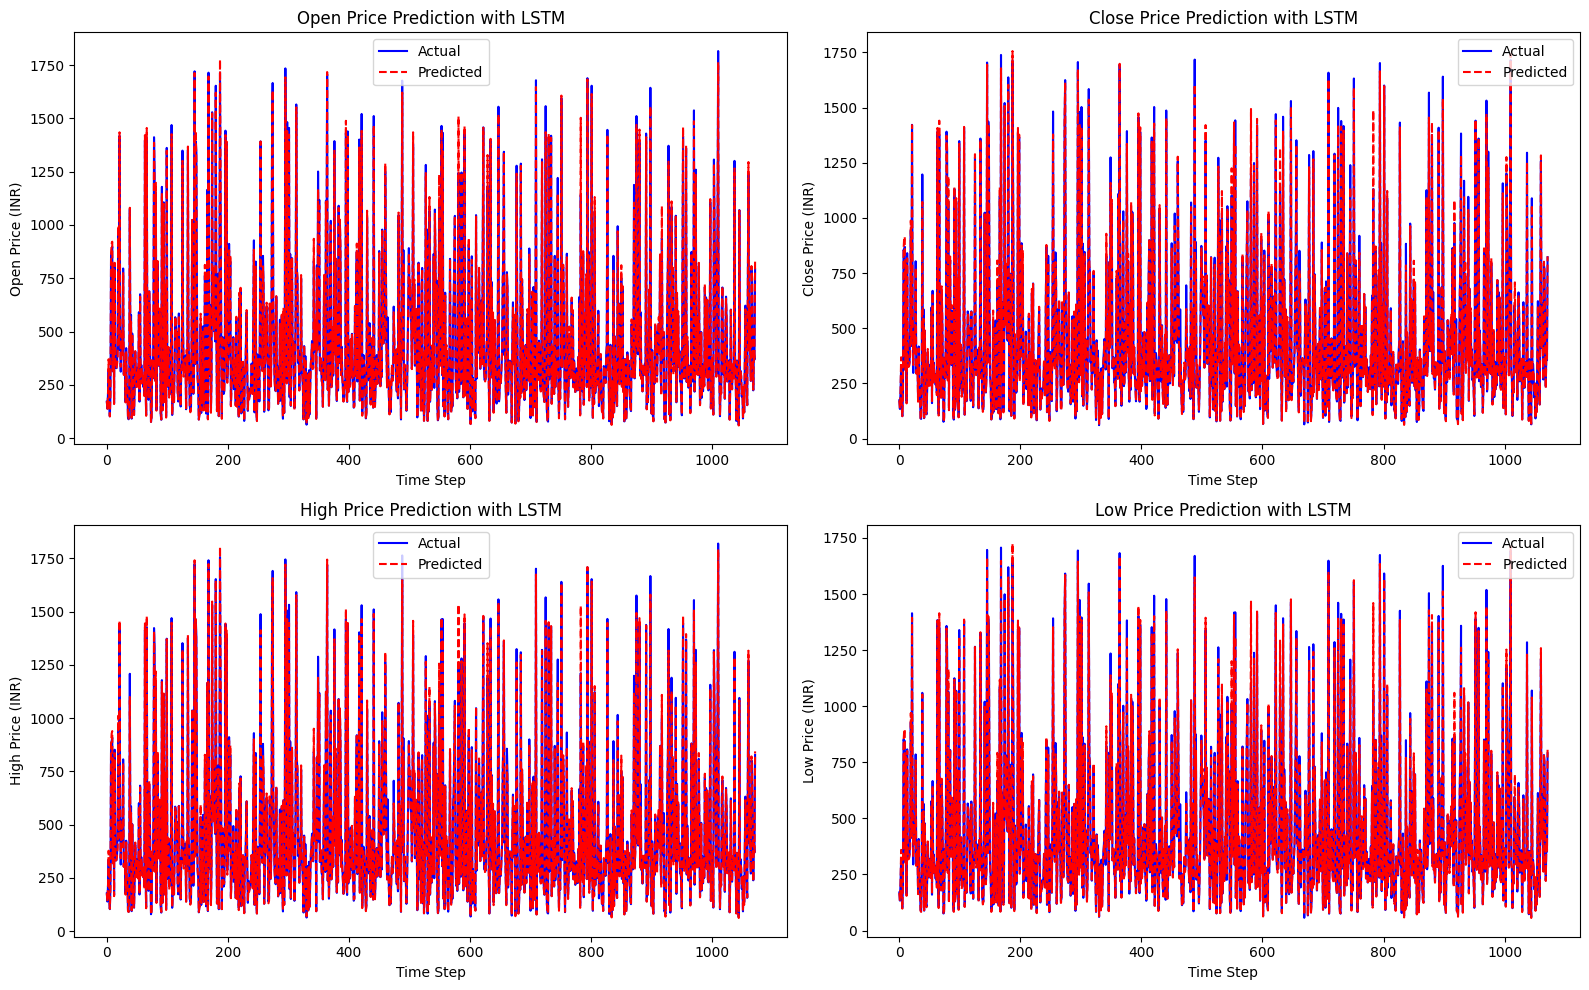

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Predicted prices for the next day using LSTM:
Opening Price: ₹1028.04
Closing Price: ₹1020.25
Maximum Price: ₹1043.59
Minimum Price: ₹1000.92


In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetching stock data
def fetch_stock_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="max")
        if data.empty:
            raise ValueError(f"No data found for ticker {ticker}")
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

stock = 'WOCKPHARMA.NS'
historical_data = fetch_stock_data(stock)

if historical_data.empty:
    raise SystemExit("Exiting due to data fetch error.")

# Preprocessing and Feature Engineering for LSTM
def preprocess_data_lstm(stock_data):
    stock_data['Prev Close'] = stock_data['Close'].shift(1)
    stock_data['100-Day MA'] = stock_data['Close'].rolling(window=100).mean()
    stock_data = stock_data.dropna()

    # Selecting features and target variables
    X = stock_data[['Prev Close', '100-Day MA', 'Volume']]
    y = stock_data[['Open', 'Close', 'High', 'Low']]

    return X, y

X, y = preprocess_data_lstm(historical_data)

# Scaling data (MinMax scaling is better suited for LSTMs)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)

# Reshaping data to [samples, time steps, features] for LSTM
def create_lstm_sequences(X, y, time_steps=60):
    X_lstm, y_lstm = [], []
    for i in range(time_steps, len(X)):
        X_lstm.append(X[i-time_steps:i, :])
        y_lstm.append(y[i, :])
    return np.array(X_lstm), np.array(y_lstm)

time_steps = 60  # Number of time steps
X_lstm, y_lstm = create_lstm_sequences(X_scaled, y_scaled, time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Building the LSTM Model
model = Sequential()

# Adding LSTM layers and dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer (4 outputs: Open, Close, High, Low prices)
model.add(Dense(units=4))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Model Evaluation
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Visualization
def plot_lstm_predictions(y_test, y_pred, target_names):
    plt.figure(figsize=(16, 10))
    for i, target_name in enumerate(target_names):
        plt.subplot(2, 2, i+1)
        plt.plot(y_test[:, i], label='Actual', color='blue')
        plt.plot(y_pred[:, i], label='Predicted', color='red', linestyle='--')
        plt.xlabel('Time Step')
        plt.ylabel(f'{target_name} Price (INR)')
        plt.title(f'{target_name} Price Prediction with LSTM')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_lstm_predictions(y_test_actual, y_pred, ['Open', 'Close', 'High', 'Low'])

# Predicting the next day's prices using LSTM
def predict_next_day_lstm(model, stock_data, scaler_X, scaler_y, time_steps=60):
    # Get the last time_steps data points to use for prediction
    last_data = stock_data[-time_steps:].copy()

    # Scale the data
    last_data_scaled = scaler_X.transform(last_data)
    last_data_scaled = np.reshape(last_data_scaled, (1, last_data_scaled.shape[0], last_data_scaled.shape[1]))

    # Predict the next day's prices
    next_day_prediction_scaled = model.predict(last_data_scaled)
    next_day_prediction = scaler_y.inverse_transform(next_day_prediction_scaled)

    return next_day_prediction[0]

next_day_prices = predict_next_day_lstm(model, X, scaler_X, scaler_y, time_steps)
print(f'\nPredicted prices for the next day using LSTM:')
print(f'Opening Price: ₹{next_day_prices[0]:.2f}')
print(f'Closing Price: ₹{next_day_prices[1]:.2f}')
print(f'Maximum Price: ₹{next_day_prices[2]:.2f}')
print(f'Minimum Price: ₹{next_day_prices[3]:.2f}')
